# Saving Lives with Machine Learning | Diabetes Data
This dataset contains information from over 100,000 hospital visits. Each row represents a single patient visit to the hospital. 
We’re trying to predict whether a patient will be readmitted to the hospital after their visit.

## Bagging vs Boosting:
Bagging = many models together, average it out.

Boosting = build models step by step, learn from mistakes.

In [1]:
import pandas as pd

# Load the CSV
df = pd.read_csv("/kaggle/input/diabetes/diabetic_data.csv")

# Show basic info
print(df.shape)
df.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Find Missing Values

In [2]:
#search for columns with missing values:
def findNA():
    print("Missing data by column as a percent:")
    findNA=df.isnull().sum().sort_values(ascending=False)/len(df)
    print(findNA.head())
# findNA()

In [3]:
# Drop max_glu_serum and A1Cresult because too much missing data
df = df.drop(['max_glu_serum', 'A1Cresult'], axis=1)  # Too many missing values: max_glu_serum 0.947468  A1Cresult 0.832773
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
print(df.dtypes)

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide           

In [5]:
df_non_numeric = df.select_dtypes(exclude=['number'])
df_non_numeric.head()

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,metformin,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,?,Pediatrics-Endocrinology,250.83,?,?,No,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,?,?,276,250.01,255,No,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,?,?,648,250,V27,No,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,?,?,8,250.43,403,No,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,?,?,197,157,250,No,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Feature Engineer

In [6]:
# Drop
df.drop(['payer_code', 'weight'], axis=1, inplace=True) # Not useful

# Encode gender
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Convert age ranges to midpoint
age_map = {'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
           '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75,
           '[80-90)': 85, '[90-100)': 95}
df['age'] = df['age'].map(age_map)

In [7]:
df['age'].head(15)

0      5
1     15
2     25
3     35
4     45
5     55
6     65
7     75
8     85
9     95
10    45
11    65
12    45
13    85
14    65
Name: age, dtype: int64

In [8]:
df['readmitted'] = df['readmitted'].map({'NO': 0, '>30': 1, '<30': 1})
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,0.0,5,6,25,1,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,0.0,15,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,0.0,25,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,1.0,35,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,1.0,45,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [9]:
df = df.select_dtypes(include=['number'])
df.head()

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
0,2278392,8222157,0.0,5,6,25,1,1,41,0,1,0,0,0,1,0
1,149190,55629189,0.0,15,1,1,7,3,59,0,18,0,0,0,9,1
2,64410,86047875,0.0,25,1,1,7,2,11,5,13,2,0,1,6,0
3,500364,82442376,1.0,35,1,1,7,2,44,1,16,0,0,0,7,0
4,16680,42519267,1.0,45,1,1,7,1,51,0,8,0,0,0,5,0


## Split Data

In [10]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X=df.drop('readmitted', axis=1)
y=df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)

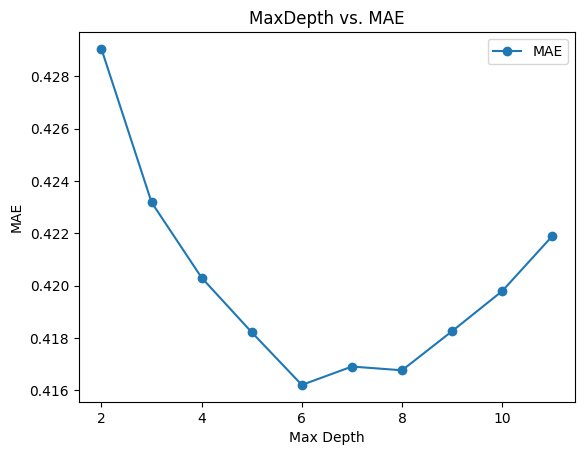

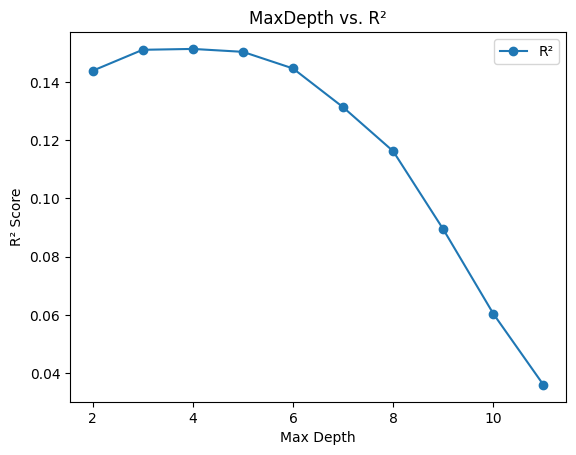

In [11]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

maxDepth = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
listMAE = []
listR2 = []

for d in maxDepth:
    boost_gs = xgb.XGBRegressor(max_depth=d)
    boost_gs.fit(X_train, y_train)
    y_pred = boost_gs.predict(X_test)

    xgMAE = mean_absolute_error(y_test, y_pred)
    xgR2 = r2_score(y_test, y_pred).round(4)
    listMAE.append(xgMAE)
    listR2.append(xgR2)

# Plot MAE
plt.plot(maxDepth, listMAE, marker='o', label='MAE')
plt.title('MaxDepth vs. MAE')
plt.ylabel('MAE')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

# Plot R2
plt.plot(maxDepth, listR2, marker='o', label='R²')
plt.title('MaxDepth vs. R²')
plt.ylabel('R² Score')
plt.xlabel('Max Depth')
plt.legend()
plt.show()